/tmp/ipykernel_2106597/3426198870.py:61: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  handles = [plt.Rectangle((0, 0), 1, 1, color=c, edgecolor='k') for c in color_list]


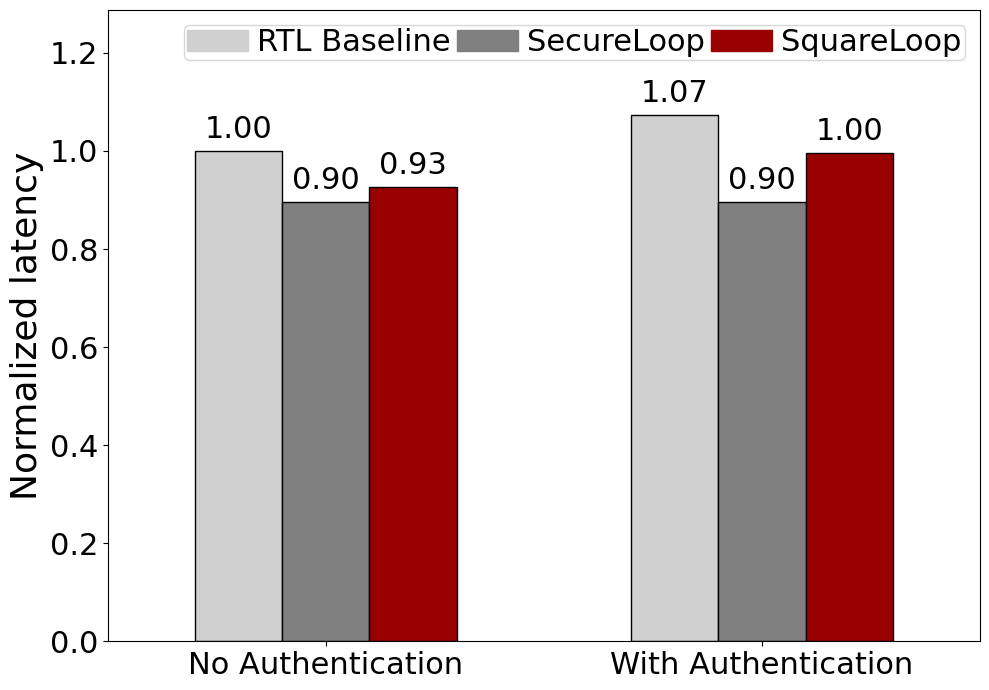

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Raw latencies
latencies_plain_raw = [164478, 147456, 152480]
latencies_crypto_raw = [176480, 147456, 163776]

# Normalize to global minimum
global_min = latencies_plain_raw[0]
latencies_plain = [v / global_min for v in latencies_plain_raw]
latencies_crypto = [v / global_min for v in latencies_crypto_raw]

group_labels = ["No Authentication", "With Authentication"]
method_labels = ["RTL Baseline", "SecureLoop", "SquareLoop"]
color_list = ["#D0D0D0", "#808080", "#990000"]

# Font sizes
SMALL_SIZE = 18
MEDIUM_SIZE = 22
BIGGER_SIZE = 26

bar_width = 0.2  # slightly wider bars
fig, ax = plt.subplots(figsize=(10, 7))

# Fixed group centers
x_center_plain = 0
x_center_crypto = 1

# Offset each bar in a group by this
offsets = np.array([-bar_width, 0, bar_width])

# Compute x positions for bars
x_plain = x_center_plain + offsets
x_crypto = x_center_crypto + offsets

# Plot bars
plain_bars = ax.bar(x_plain, latencies_plain, width=bar_width, color=color_list, edgecolor='k')
crypto_bars = ax.bar(x_crypto, latencies_crypto, width=bar_width, color=color_list, edgecolor='k')

# X ticks
ax.set_xticks([x_center_plain, x_center_crypto])
ax.set_xticklabels(group_labels, fontsize=MEDIUM_SIZE)

# Labels and limits
ax.set_ylabel("Normalized latency", fontsize=BIGGER_SIZE)
ax.set_xlim([-0.5, 1.5])
ax.set_ylim([0, max(latencies_plain + latencies_crypto) * 1.2])
ax.tick_params(axis='y', labelsize=MEDIUM_SIZE)

# Annotate bar values
for bars in [plain_bars, crypto_bars]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=MEDIUM_SIZE)

# Legend
handles = [plt.Rectangle((0, 0), 1, 1, color=c, edgecolor='k') for c in color_list]
ax.legend(handles, method_labels, fontsize=MEDIUM_SIZE, title_fontsize=MEDIUM_SIZE, loc='best', ncol=3, handletextpad=0.3, columnspacing=0.2, borderpad=0.1)

plt.tight_layout()
plt.savefig("RTL_validation_no_overlap.pdf", bbox_inches="tight", transparent=True)
plt.show()